 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns_csv = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_csv.dropna(inplace=True)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [15]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns_csv = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_csv.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [16]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [17]:
algo_returns_csv.dropna(inplace=True)
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [18]:
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_path = Path("Resources/sp500_history.csv")
sp500_history_csv = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_csv.sort_index(ascending = True, inplace = True)
sp500_history_csv.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [20]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [21]:
# Fix Data Types
sp500_history_csv['Close'] = sp500_history_csv['Close'].str.replace('$','')

In [22]:
sp500_history_csv['Close'] = sp500_history_csv['Close'].astype('float')

In [23]:
sp500_history_csv.dtypes

Close    float64
dtype: object

In [24]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_csv.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [25]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [26]:
# Rename Columns
sp500_daily_returns.columns = ["SP500"]
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [127]:
# Concatenate all DataFrames into a single DataFrame
joined_daily_returns = pd.concat([whale_returns_csv, algo_returns_csv, sp500_daily_returns], axis="columns", join="inner")
joined_daily_returns.columns = joined_daily_returns.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
joined_daily_returns.dropna(inplace=True)
joined_daily_returns

,soros_fund_management_llc,paulson_&_co.inc.,tiger_global_management_llc,berkshire_hathaway_inc,algo_1,algo_2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

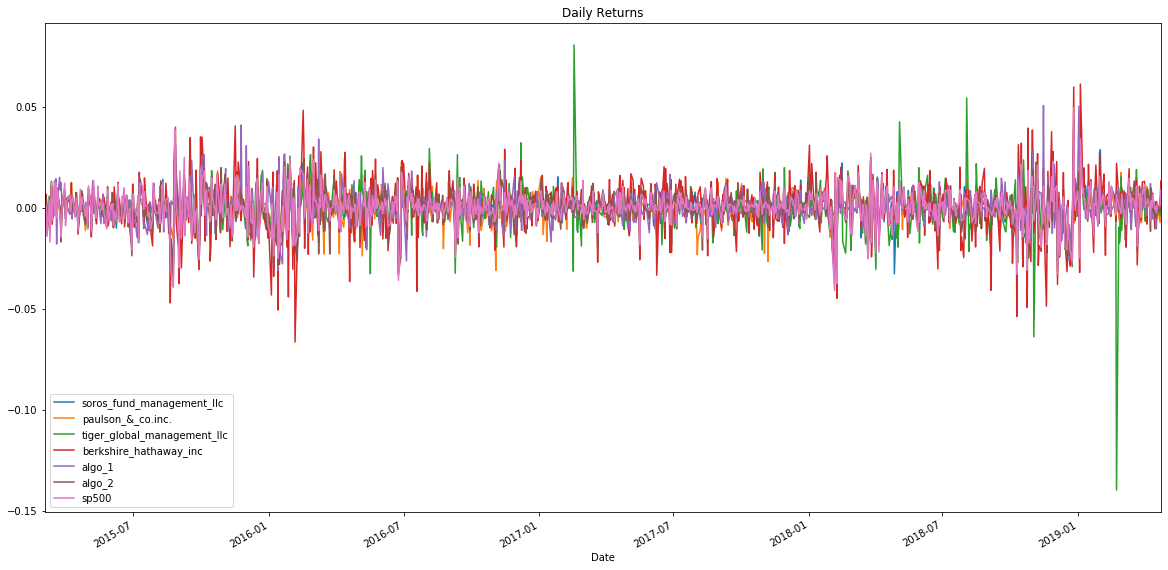

In [34]:
# Plot daily returns
joined_daily_returns.plot(figsize=(20, 10), title='Daily Returns')

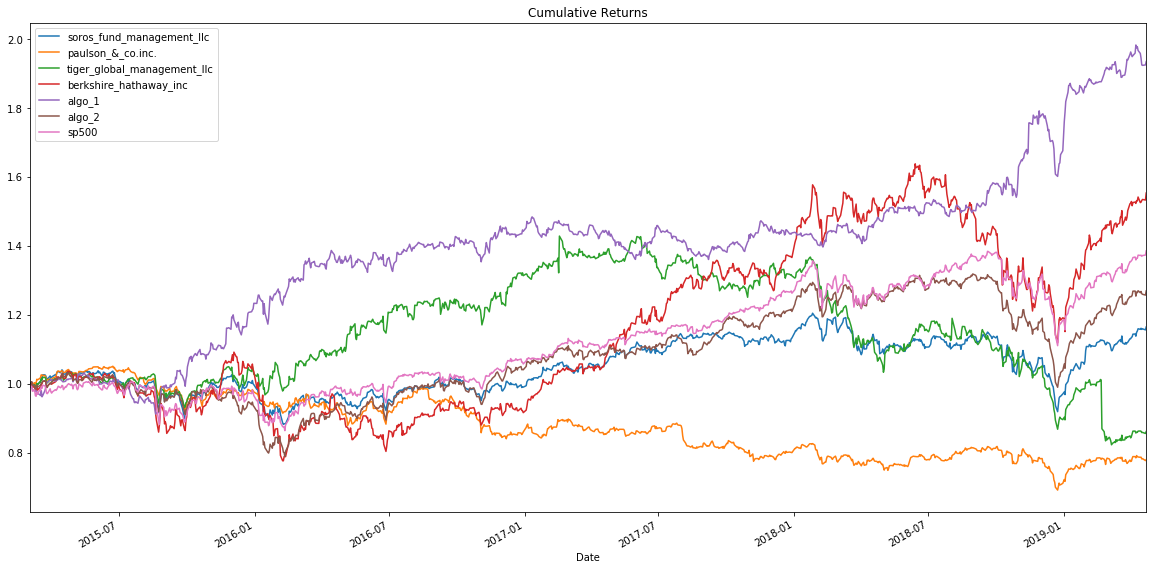

In [35]:
# Plot cumulative returns
cumulative_returns = (1 + joined_daily_returns).cumprod() 
cumulative_returns.plot(figsize=(20, 10), title='Cumulative Returns')

In [36]:
#Does any portfolio outperform the S&P 500?
print("Yes, Algo 1 and Berkshire outperform the S&P 500 in the first quarter of 2019.")

Yes, Algo 1 and Berkshire outperform the S&P 500 in the first quarter of 2019.


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

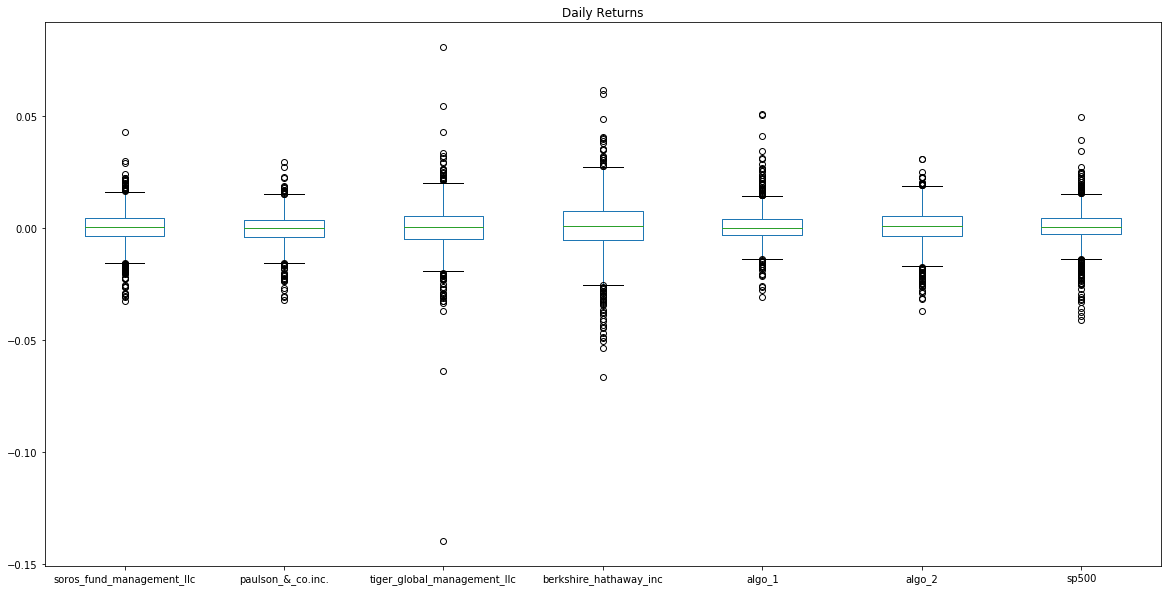

In [37]:
# Box plot to visually show risk
joined_daily_returns.plot.box(figsize=(20, 10), title='Daily Returns')

In [38]:
#  Which box has the largest spread? Which has the smallest spread?
print("Tiger Global Management LLC has the largest spread while Paulson & Co Inc has the smallest spread.")

Tiger Global Management LLC has the largest spread while Paulson & Co Inc has the smallest spread.


In [39]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
daily_returns_std = joined_daily_returns.std()
daily_returns_std

soros_fund_management_llc      0.007895
paulson_&_co.inc.              0.007023
tiger_global_management_llc    0.010894
berkshire_hathaway_inc         0.012919
algo_1                         0.007620
algo_2                         0.008342
sp500                          0.008554
dtype: float64

In [40]:
#  Which portfolios are riskier than the S&P 500?
print("Berkshire Hathaway and Tiger Global Management LLC are riskier than the S&P 500.\n"
"Their standard deviations are greater than that of the S&P 500")

Berkshire Hathaway and Tiger Global Management LLC are riskier than the S&P 500.
Their standard deviations are greater than that of the S&P 500


In [41]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_returns_std * np.sqrt(252)
annualized_std

soros_fund_management_llc      0.125335
paulson_&_co.inc.              0.111488
tiger_global_management_llc    0.172936
berkshire_hathaway_inc         0.205077
algo_1                         0.120967
algo_2                         0.132430
sp500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

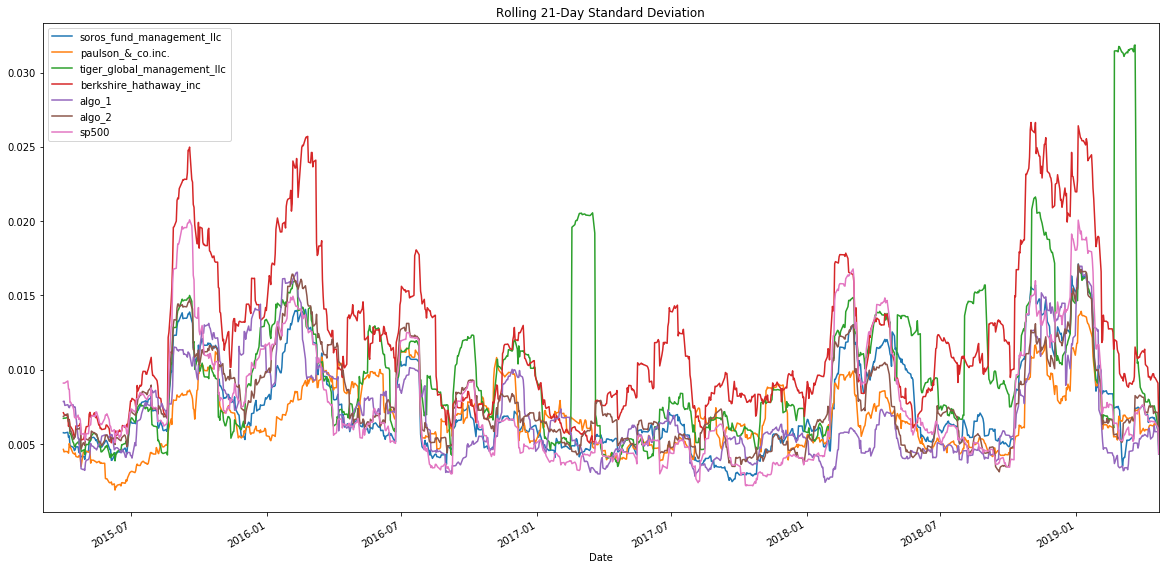

In [42]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
joined_daily_returns.rolling(window=21).std().plot(figsize=(20, 10), title='Rolling 21-Day Standard Deviation')

In [95]:
# Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
print("Yes, most of the the stocks follow the same risk trend as the S&P 500. Tiger Global in the other hand has a more volatile risk pattern than the S&P 500")

Yes most of the the stocks follow the same risk trend as the S&P 500. Tiger Global in the other hand has a more volatile risk pattern than the S&P 500


In [119]:
# Correlation
correlation = joined_daily_returns.corr(method='pearson')
correlation


,soros_fund_management_llc,paulson_&_co.inc.,tiger_global_management_llc,berkshire_hathaway_inc,algo_1,algo_2,sp500
soros_fund_management_llc,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
paulson_&_co.inc.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
tiger_global_management_llc,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
berkshire_hathaway_inc,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
algo_1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
algo_2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [45]:
#Which returns most closely mimic the S&P?
print("Algo 2 returns most closely mimic the S&P500 since it has a value closest to 1.")

Algo 2 returns most closely mimic the S&P500 since it has a value closest to 1.


In [46]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

brk_covariance = joined_daily_returns['berkshire_hathaway_inc'].cov(joined_daily_returns['sp500'])
brk_variance = joined_daily_returns['sp500'].var()
brk_beta = brk_covariance / brk_variance
brk_beta

1.1347891297491723

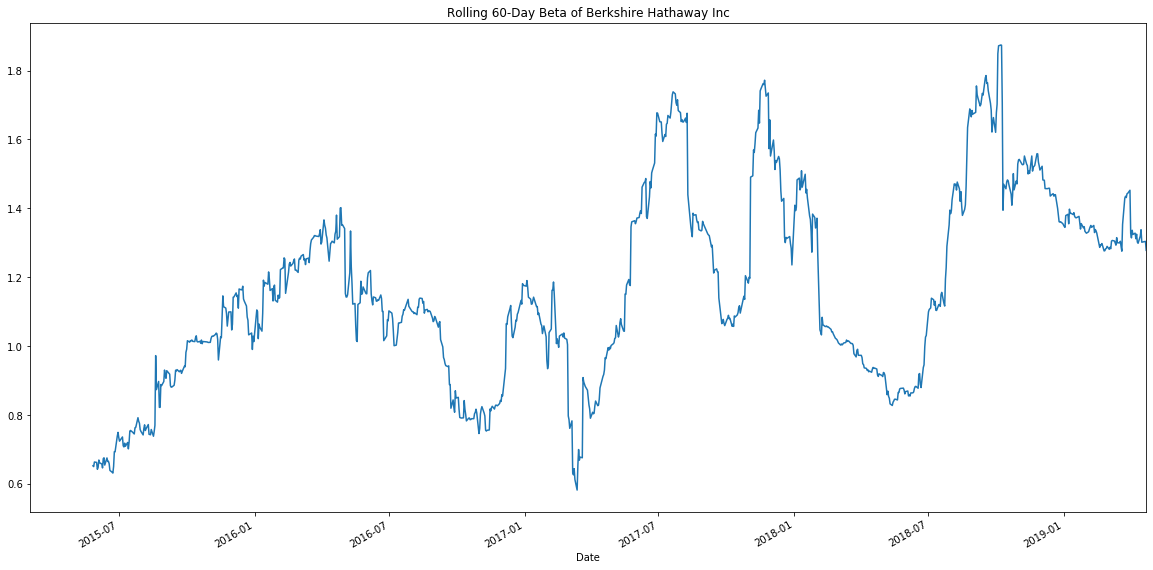

In [47]:
#Rolling beta for Berkshire Hathaway Inc
rolling_covariance = joined_daily_returns['berkshire_hathaway_inc'].rolling(window=60).cov(joined_daily_returns['sp500'])
rolling_variance = joined_daily_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway Inc')

In [48]:
#Does the portfolio seem sensitive to movements in the S&P 500?
print("Yes, the Pearson Correlation shows that there's a positive linear relationship between the Whale Portfolio and the S&P 500.\n"
     "However; the beta value for Berkshire Hathaway LLC demonstrates a 33% higher volatility than the S&P 500.")

Yes, the Pearson Correlation shows that there's a positive linear relationship between the Whale Portfolio and the S&P 500.
However; the beta value for Berkshire Hathaway LLC demonstrates a 33% higher volatility than the S&P 500.


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

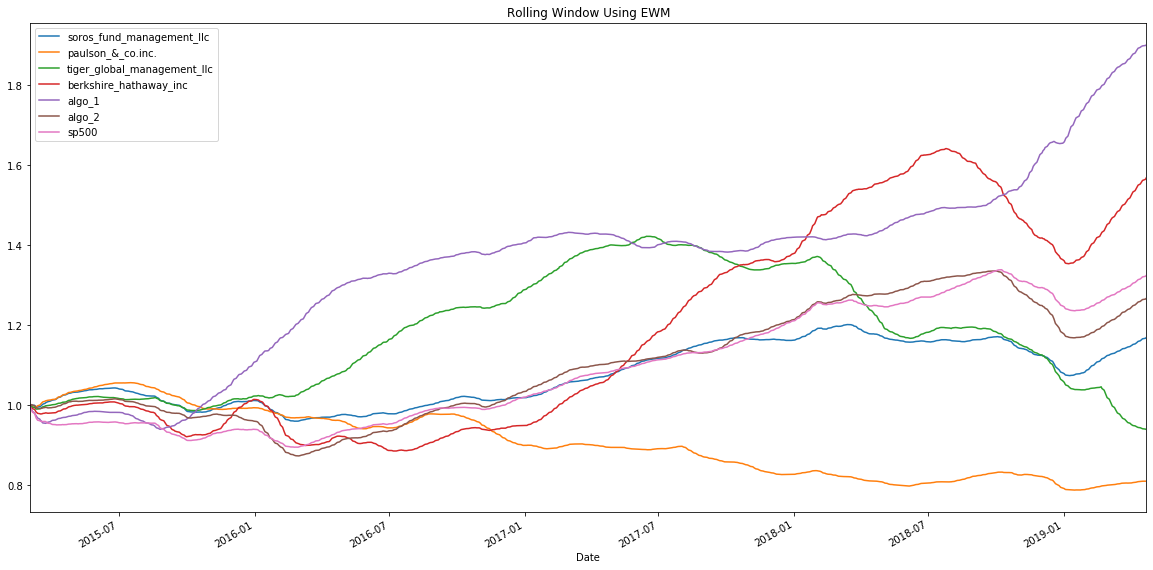

In [49]:
joined_ewm = joined_daily_returns.ewm(halflife=21).mean()
(1+joined_ewm).cumprod().plot(figsize=(20,10), title="Rolling Window Using EWM")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [50]:
# Annualzied Sharpe Ratios
sharpe_ratios = (joined_daily_returns.mean() * 252) / (joined_daily_returns.std() * np.sqrt(252))
sharpe_ratios

soros_fund_management_llc      0.356417
paulson_&_co.inc.             -0.483570
tiger_global_management_llc   -0.121060
berkshire_hathaway_inc         0.621810
algo_1                         1.378648
algo_2                         0.501364
sp500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

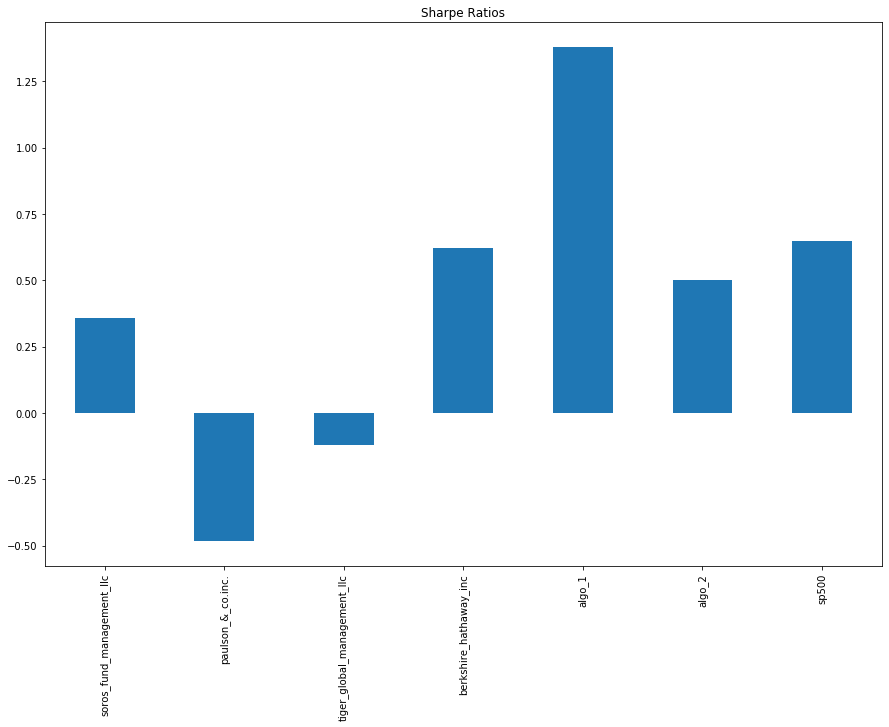

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(15, 10), title="Sharpe Ratios")

In [52]:
# On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?
print("According to the Sharpe Ratios data, the Algo 1 outperformed both the Whale portfolio and the market.\n"
      "While the Algo 2 fell below Berkshire Hathaway and the market.")

According to the Sharpe Ratios data, the Algo 1 outperformed both the Whale portfolio and the market.
While the Algo 2 fell below Berkshire Hathaway and the market.


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [53]:
# Read the first stock
mrk_history_path = Path("Resources/mrk_history.csv")
mrk_history_csv = pd.read_csv(mrk_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
mrk_daily_returns = mrk_history_csv.pct_change()
mrk_daily_returns.head()


,Close
Date,
2017-01-03,NaN
2017-01-04,-0.000333
2017-01-05,-0.000333
2017-01-06,0.002662
2017-01-09,0.013771


In [54]:
# Read the second stock
jnj_history_path = Path("Resources/jnj_history.csv")
jnj_history_csv = pd.read_csv(jnj_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
jnj_daily_returns = jnj_history_csv.pct_change()
jnj_daily_returns.head()


,Close
Date,
2017-01-03,NaN
2017-01-04,-0.001640
2017-01-05,0.010463
2017-01-06,-0.004792
2017-01-07,-0.000172


In [55]:
# Read the third stock
pg_history_path = Path("Resources/pg_history.csv")
pg_history_csv = pd.read_csv(pg_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
pg_daily_returns = pg_history_csv.pct_change()
pg_daily_returns.head()


,Close
Date,
2017-01-03,NaN
2017-01-04,0.003563
2017-01-05,0.006627
2017-01-06,-0.000353
2017-01-09,-0.007409


In [56]:
# Concatenate all stocks into a single DataFrame
combined_daily_returns = pd.concat([mrk_daily_returns, jnj_daily_returns, pg_daily_returns], axis="columns", join="inner")
combined_daily_returns.head()

,Close,Close,Close
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,-0.000333,-0.001640,0.003563
2017-01-05,-0.000333,0.010463,0.006627
2017-01-06,0.002662,-0.004792,-0.000353
2017-01-09,0.013771,-0.012311,-0.007409


In [57]:
# Reset the index
combined_daily_returns.columns = ['merck_&_co', 'johnson_&_johnson', 'proctor_&_gamble']
combined_daily_returns.head()

,merck_&_co,johnson_&_johnson,proctor_&_gamble
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,-0.000333,-0.001640,0.003563
2017-01-05,-0.000333,0.010463,0.006627
2017-01-06,0.002662,-0.004792,-0.000353
2017-01-09,0.013771,-0.012311,-0.007409


In [58]:
# Drop Nulls
combined_daily_returns.dropna(inplace=True)
combined_daily_returns.isnull().sum()

merck_&_co           0
johnson_&_johnson    0
proctor_&_gamble     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [59]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = combined_daily_returns.dot(weights)
portfolio_returns.head(15)

Date
2017-01-04    0.000530
2017-01-05    0.005586
2017-01-06   -0.000828
2017-01-09   -0.001983
2017-01-10   -0.010351
2017-01-11    0.010493
2017-01-12    0.004281
2017-01-13    0.000879
2017-01-17   -0.006129
2017-01-18    0.000326
2017-01-19   -0.008317
2017-01-20    0.027568
2017-01-23   -0.005765
2017-01-24    0.001215
2017-01-25   -0.003158
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [117]:
all_daily_returns_unordered= pd.concat([joined_daily_returns, combined_daily_returns], axis="columns", join="inner")
all_daily_returns = all_daily_returns_unordered[['soros_fund_management_llc', 'paulson_&_co.inc.', 'tiger_global_management_llc', 
                                                 'berkshire_hathaway_inc', 'algo_1', 'algo_2', 'merck_&_co', 'johnson_&_johnson', 'proctor_&_gamble', 'sp500'
                                                ]]
#all_daily_returns_unordered= pd.concat([joined_daily_returns, portfolio_returns], axis="columns", join="inner")
#all_daily_returns_unordered.rename(columns={0:"my_portfolio"}, inplace = True)
#all_daily_returns = all_daily_returns_unordered[['soros_fund_management_llc', 'paulson_&_co.inc.', 'tiger_global_management_llc', 
#                                                 'berkshire_hathaway_inc', 'algo_1', 'algo_2', 'my_portfolio', 'sp500'
#                                                ]]
all_daily_returns.head()


,soros_fund_management_llc,paulson_&_co.inc.,tiger_global_management_llc,berkshire_hathaway_inc,algo_1,algo_2,merck_&_co,johnson_&_johnson,proctor_&_gamble,sp500
Date,,,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,-0.000333,-0.001640,0.003563,0.005722
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000333,0.010463,0.006627,-0.000771
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.002662,-0.004792,-0.000353,0.003517
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,0.013771,-0.012311,-0.007409,-0.003549
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,-0.019313,-0.000959,-0.010782,0.000000


In [80]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#all_daily_returns.head()
#all_daily_returns.tail()

all_daily_returns.isnull().sum()

soros_fund_management_llc      0
paulson_&_co.inc.              0
tiger_global_management_llc    0
berkshire_hathaway_inc         0
algo_1                         0
algo_2                         0
merck_&_co                     0
johnson_&_johnson              0
proctor_&_gamble               0
sp500                          0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

## Performance

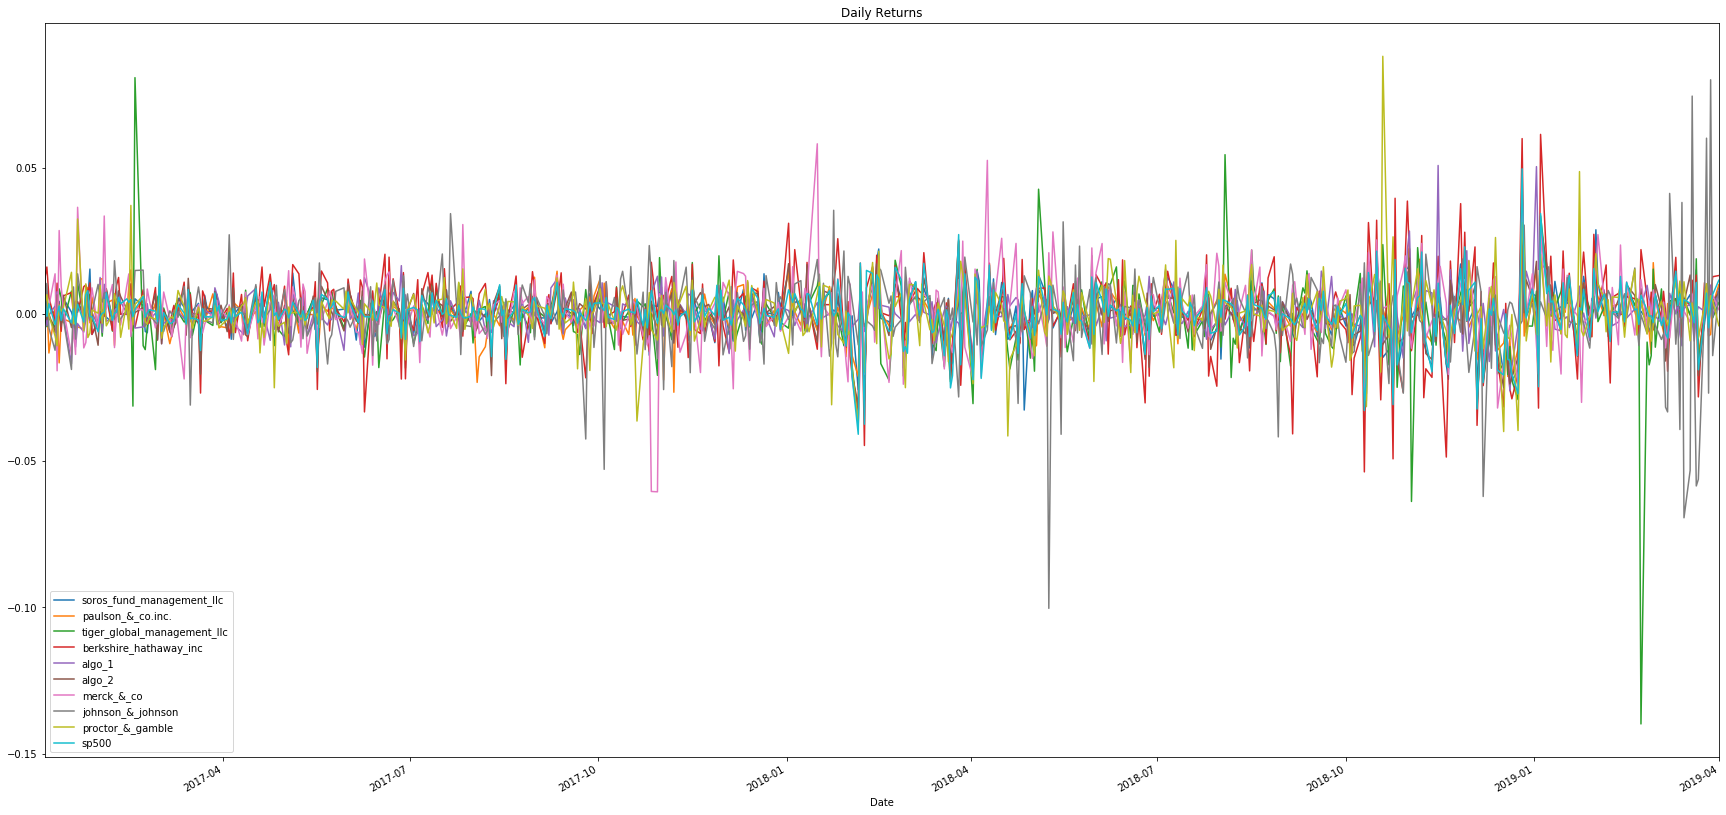

In [81]:
all_daily_returns.plot(figsize=(30, 15), title='Daily Returns')

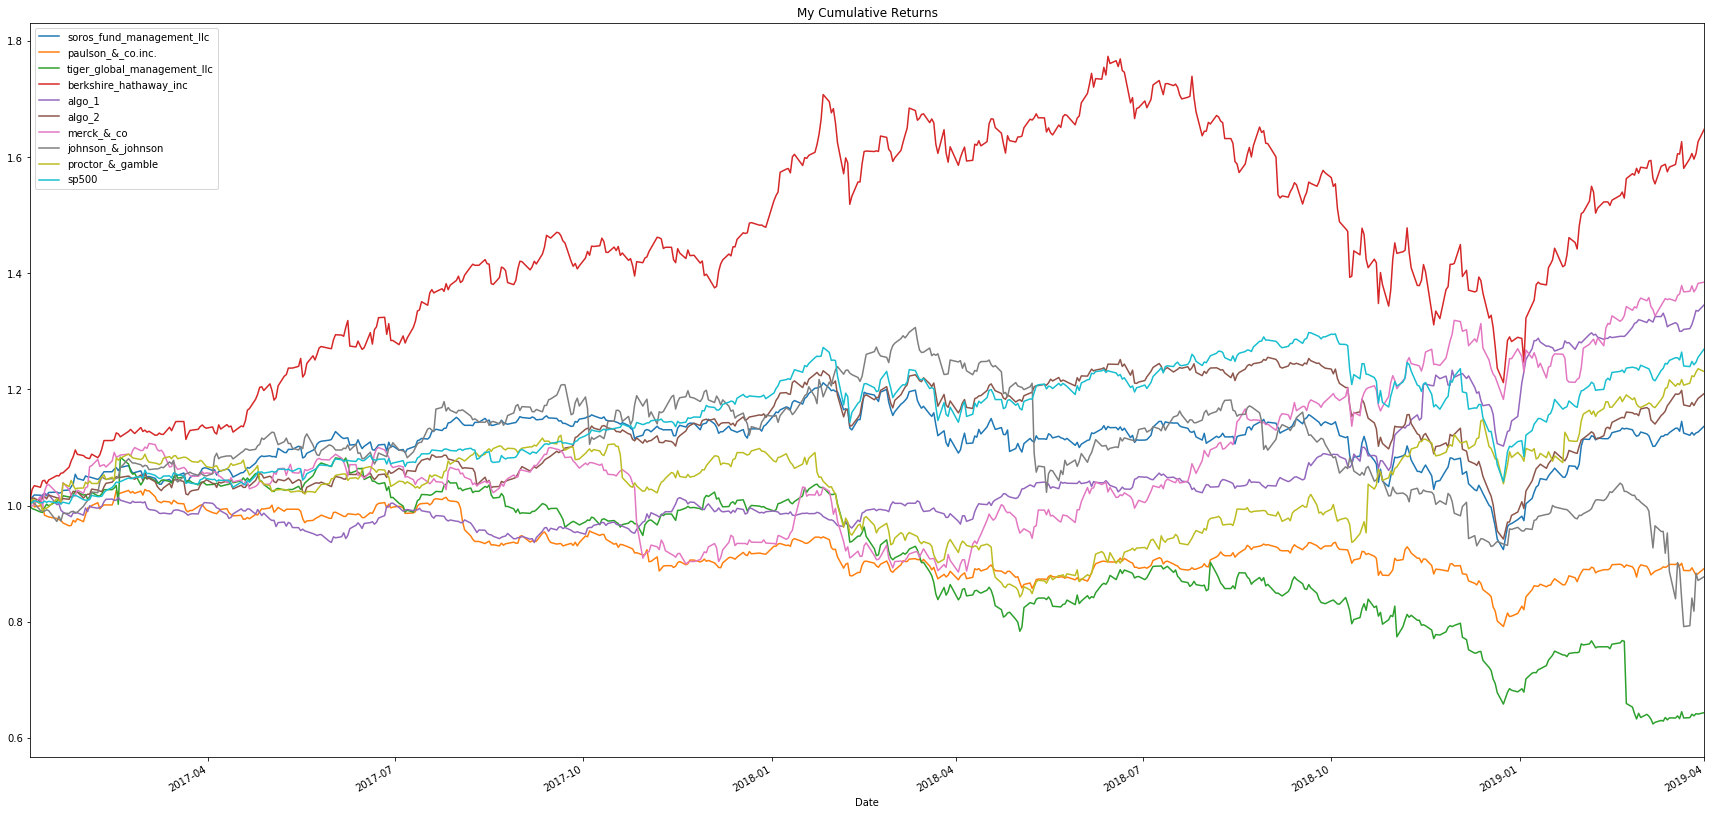

In [82]:
my_cumulative_returns = (1 + all_daily_returns).cumprod() 
my_cumulative_returns.plot(figsize=(30, 15), title='My Cumulative Returns')

## Risk

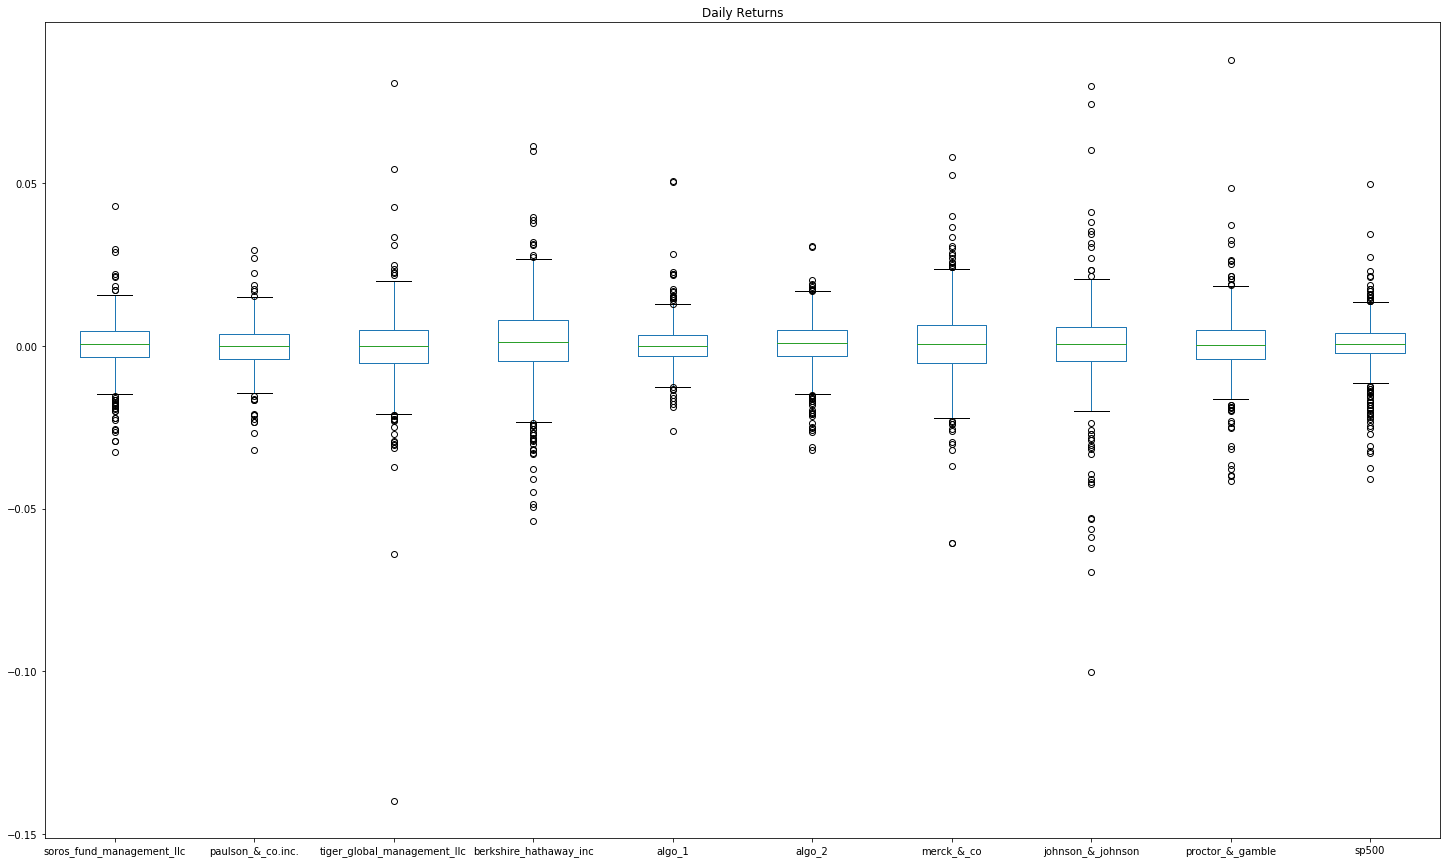

In [126]:
# Box plot to visually show risk
all_daily_returns.plot.box(figsize=(25, 15), title='Daily Returns')

In [83]:
#Standard Deviation 
all_daily_returns_std = all_daily_returns.std()
all_daily_returns_std

soros_fund_management_llc      0.007932
paulson_&_co.inc.              0.006824
tiger_global_management_llc    0.012011
berkshire_hathaway_inc         0.012628
algo_1                         0.006749
algo_2                         0.007613
merck_&_co                     0.011303
johnson_&_johnson              0.013534
proctor_&_gamble               0.010016
sp500                          0.008224
dtype: float64

In [84]:
# annualized standard deviation (252 trading days)
all_annualized_std = all_daily_returns_std * np.sqrt(252)
all_annualized_std

soros_fund_management_llc      0.125924
paulson_&_co.inc.              0.108322
tiger_global_management_llc    0.190675
berkshire_hathaway_inc         0.200464
algo_1                         0.107143
algo_2                         0.120846
merck_&_co                     0.179424
johnson_&_johnson              0.214846
proctor_&_gamble               0.158993
sp500                          0.130555
dtype: float64

## Rolling

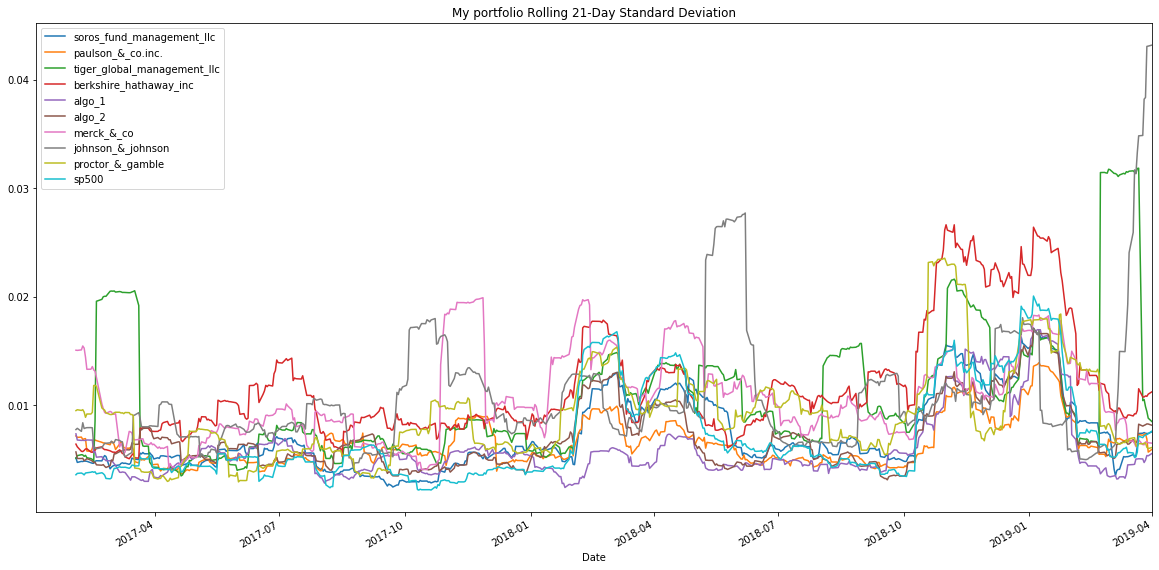

In [85]:
Rolling= all_daily_returns.rolling(window=21).std().plot(figsize=(20, 10), title='My portfolio Rolling 21-Day Standard Deviation')
Rolling

## Beta

In [106]:
mrk_covariance = all_daily_returns['merck_&_co'].cov(all_daily_returns['sp500'])
variance = all_daily_returns['sp500'].var()
mrk_beta = round(mrk_covariance / mrk_variance,3)

jnj_covariance = all_daily_returns['johnson_&_johnson'].cov(all_daily_returns['sp500'])
jnj_beta = round(jnj_covariance / variance,4)

pg_covariance = all_daily_returns['proctor_&_gamble'].cov(all_daily_returns['sp500'])
pg_beta = round(pg_covariance / variance,3)

print(f"Beta for Merck & Co: {mrk_beta}\n"
     f"Beta for Johnson & Johnson: {jnj_beta}\n"
     f"Beta for Proctor & Gamble: {pg_beta}\n"
     )

Beta for Merck & Co: 0.664
Beta for Johnson & Johnson: 0.0504
Beta for Proctor & Gamble: 0.456



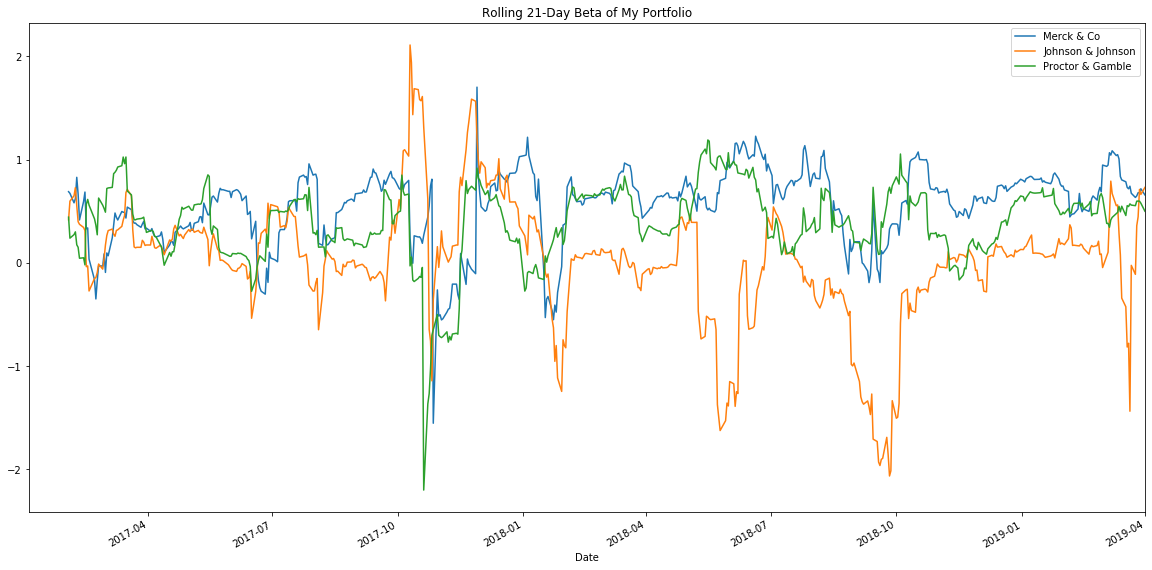

In [105]:
mrk_rolling_covariance = all_daily_returns['merck_&_co'].rolling(window=21).cov(all_daily_returns['sp500'])
mrk_rolling_variance = all_daily_returns['sp500'].rolling(window=21).var()
mrk_rolling_beta = mrk_rolling_covariance / mrk_rolling_variance

jnj_rolling_covariance = all_daily_returns['johnson_&_johnson'].rolling(window=21).cov(all_daily_returns['sp500'])
jnj_rolling_variance = all_daily_returns['sp500'].rolling(window=21).var()
jnj_rolling_beta = jnj_rolling_covariance / jnj_rolling_variance

pg_rolling_covariance = all_daily_returns['proctor_&_gamble'].rolling(window=21).cov(all_daily_returns['sp500'])
pg_rolling_variance = all_daily_returns['sp500'].rolling(window=21).var()
pg_rolling_beta = pg_rolling_covariance / pg_rolling_variance

ax = mrk_rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of My Portfolio')
jnj_rolling_beta.plot(ax=ax)
pg_rolling_beta.plot(ax=ax)

ax.legend(['Merck & Co', 
           'Johnson & Johnson', 
           'Proctor & Gamble', 
           ])

In [115]:
print("The beta value shows that my portfolio is 61% less volatile than the S&P500.")

The beta value shows that my portfolio is 61% less volatile than the S&P500.


## Sharpe Ratios

In [112]:
# Annualzied Sharpe Ratios
my_sharpe_ratios = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))
my_sharpe_ratios

soros_fund_management_llc      0.518851
paulson_&_co.inc.             -0.419126
tiger_global_management_llc   -0.937477
berkshire_hathaway_inc         1.216492
algo_1                         1.294177
algo_2                         0.714342
merck_&_co                     0.902110
johnson_&_johnson             -0.163532
proctor_&_gamble               0.663803
sp500                          0.884664
dtype: float64

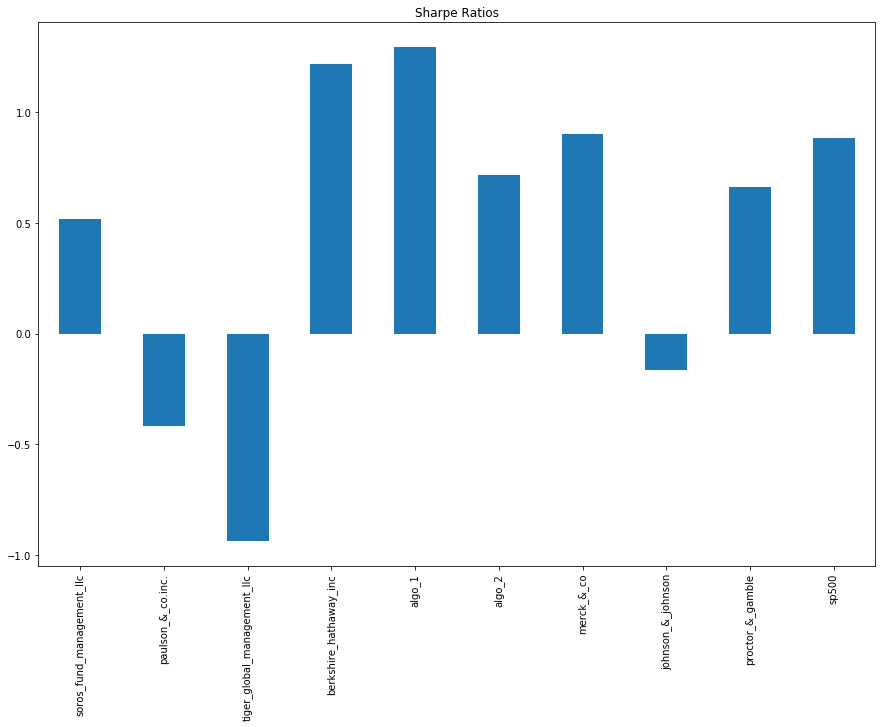

In [113]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios.plot(kind="bar", figsize=(15, 10), title="Sharpe Ratios")

In [114]:
print("Overall my investment portfolio has a good risk to reward. The sharpe ratio bar graph demonstrate a positive increase for Merck & Co and Proctor & Gamble.\n"
      "However, Johnson and Johnson came in third to last when compared with the other portfolio stocks.")

Overall my investment portfolio has a good risk to reward. The sharpe ratio bar graph demonstrate a positive increase for Merck & Co and Proctor & Gamble.
However, Johnson and Johnson came in third to last when compared with the other portfolio stocks.


## Include correlation analysis to determine which stocks (if any) are correlated

In [110]:
my_correlation = all_daily_returns.corr(method ='pearson')
my_correlation

,soros_fund_management_llc,paulson_&_co.inc.,tiger_global_management_llc,berkshire_hathaway_inc,algo_1,algo_2,merck_&_co,johnson_&_johnson,proctor_&_gamble,sp500
soros_fund_management_llc,1.000000,0.687059,0.484185,0.762298,0.286229,0.796530,0.362465,0.048511,0.252256,0.811828
paulson_&_co.inc.,0.687059,1.000000,0.416523,0.570137,0.292396,0.718939,0.377672,-0.003767,0.253636,0.696854
tiger_global_management_llc,0.484185,0.416523,1.000000,0.345145,0.093748,0.428135,0.331824,0.038621,0.383792,0.523768
berkshire_hathaway_inc,0.762298,0.570137,0.345145,1.000000,0.243153,0.739823,0.245922,0.034432,0.165090,0.798997
algo_1,0.286229,0.292396,0.093748,0.243153,1.000000,0.304659,0.072116,0.034880,-0.039524,0.253861
algo_2,0.796530,0.718939,0.428135,0.739823,0.304659,1.000000,0.355559,0.019473,0.225017,0.865517
merck_&_co,0.362465,0.377672,0.331824,0.245922,0.072116,0.355559,1.000000,0.010323,0.337820,0.482943
johnson_&_johnson,0.048511,-0.003767,0.038621,0.034432,0.034880,0.019473,0.010323,1.000000,0.059230,0.030633
proctor_&_gamble,0.252256,0.253636,0.383792,0.165090,-0.039524,0.225017,0.337820,0.059230,1.000000,0.374620
sp500,0.811828,0.696854,0.523768,0.798997,0.253861,0.865517,0.482943,0.030633,0.374620,1.000000


In [118]:
#How does your portfolio fair?
print("My portfolio has a low correlation with the S&P 500 according to the Pearson Correlation Chart.\n")

My portfolio has a low correlation with the S&P 500 according to the Pearson Correlation Chart.

